# Film Industry Analysis


#### Questions addressed in the analysis:
<ul>
    <li>How has the no. of movies made and the monetary trend of the industry changed in the past 55 years?</li>
    <li>What are the most profitable movies of the data collected? </li>
    <li>Do movies of a particular Genre gain more profit?</li>
    <li>What are the movies that incurred huge loss?</li>
    <li>Are movies of a particular Genre incurring more loss?</li>
    <li>Average values related to profitable and non-profitable movies.</li>
        <li>Is there a relation between average vote and profit gained by a movie? Do movies with high average vote always      gain high profit?</li> 
    </ul>

## Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df=pd.read_csv("tmdb-movies.csv")

In [3]:
df.release_year.min()

1960

In [4]:
df.release_year.max()

2015

The data has been collected from 1960-2015.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
#checking for duplicate rows
df.duplicated().sum()

1

## Data Cleaning

#### Issues to be addressed:
* Duplicate row present
* Budget and revenue not having int datatype
* There are many columns which will not be useful for the desired analysis.
* Rows having 0 in budget or revenue.

In [7]:
# drop duplicate row
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
#dropping undesired columns
delete=['imdb_id','homepage','tagline','keywords','overview','vote_count','budget_adj','revenue_adj']
df.drop(delete,axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   director              10821 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 933.7+ KB


In [10]:
#dropping rows with budget or revenue as 0
df['budget']=df['budget'].replace(0,np.NAN)
df['revenue']=df['revenue'].replace(0,np.NAN)
df.dropna(subset=['budget','revenue'], inplace = True)

In [11]:
#changing data type :
change_type=['budget', 'revenue']
df[change_type]=df[change_type].applymap(np.int64)

In [12]:
df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_average            float64
release_year              int64
dtype: object

## Exploratory Data Analysis

### Monetary trend and No.of movies made in past 55 years (1960-2015)

In [13]:
df.insert(4,'profit',df['revenue']-df['budget'])

In [14]:
df.head(2)

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015
1,76341,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015


In [15]:
profits = df.groupby('release_year').mean()['profit']
budgets = df.groupby('release_year').mean()['budget']
revenues = df.groupby('release_year').mean()['revenue']

In [25]:
#year=df['release_year'].unique()


AttributeError: 'DataFrame' object has no attribute 'sort'

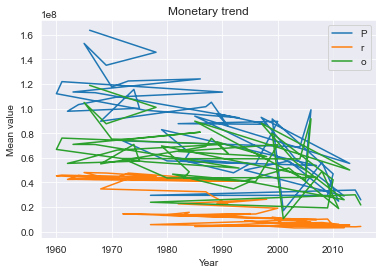

In [22]:
plt.plot(year,revenues,label="Revenues")
plt.plot(year,budgets,label="Budgets")
plt.plot(year,profits,label="Profits")
plt.xlabel('Year')
plt.ylabel('Mean value')
plt.title('Monetary trend')
plt.legend('Profit')
plt.show()

In [ ]:
#No. of movies made per year
x=df['release_year'].value_counts()
x

#### General function to find top movies as per category

In [ ]:
def percentile(col):
    x=np.percentile(df[col],75)
    df_high=df[df[col] > x]
    df_high.sort_values(by=[col],inplace=True,ascending=False)
    return df_high

## Most profitable movies:

In [ ]:
df_pro=percentile('profit')
df_pro

In [ ]:
# renaming columns of most profitable movies dataframe
df_pro.rename(columns=lambda x: x[:] + "_pro", inplace=True)

#confirming changes
df_pro

## Do movies of a particular Genre gain more profit? 

In [ ]:
drama=df_pro['genres_pro'].str.contains('Drama').sum()
action=df_pro['genres_pro'].str.contains('Action').sum()
adventure=df_pro['genres_pro'].str.contains('Adventure').sum()
romance=df_pro['genres_pro'].str.contains('Romance').sum()
thriller=df_pro['genres_pro'].str.contains('Thriller').sum()
scifi=df_pro['genres_pro'].str.contains('Science Fiction').sum()
family=df_pro['genres_pro'].str.contains('Family').sum()
war=df_pro['genres_pro'].str.contains('War').sum()
animation=df_pro['genres_pro'].str.contains('Animation').sum()
fantasy=df_pro['genres_pro'].str.contains('Fantasy').sum()
crime=df_pro['genres_pro'].str.contains('Crime').sum()
comedy=df_pro['genres_pro'].str.contains('Comedy').sum()
western=df_pro['genres_pro'].str.contains('Western').sum()
li=[drama,action,adventure,romance,thriller,scifi,family,war,comedy,fantasy,western,animation,crime]
li_names=["drama","action","adventure","romance","thriller","scifi","family","war","comedy","fantasy","western","animation","crime"]
li

In [ ]:
plt.barh(li_names,li)

#### General function to find average values related to profitable movies:

In [ ]:
def avg(col):
    return df_pro[col].mean()

In [ ]:
#Average budget of profitable movies:
avg('budget_pro')

In [ ]:
#Average vote of profitable movies:
avg('vote_average_pro')

In [ ]:
##Average runtime of profitable movies:
avg('runtime_pro')

#### General function to find lowest movies as per category

In [ ]:
def low_per(col):
    x=np.percentile(df[col],25)
    df_low=df[df[col] < x]
    df_low.sort_values(by=[col],inplace=True,ascending=False)
    return df_low

## Movies that incurred huge loss:

In [ ]:
df_low=low_per('profit')
df

In [ ]:
# renaming columns of most profitable movies dataframe
df_low.rename(columns=lambda x: x[:] + "_low", inplace=True)

# confirm changes
df_low

### Are movies of a particular Genre incurring more loss? 

In [ ]:
drama=df_low['genres_low'].str.contains('Drama').sum()
action=df_low['genres_low'].str.contains('Action').sum()
adventure=df_low['genres_low'].str.contains('Adventure').sum()
romance=df_low['genres_low'].str.contains('Romance').sum()
thriller=df_low['genres_low'].str.contains('Thriller').sum()
scifi=df_low['genres_low'].str.contains('Science Fiction').sum()
family=df_low['genres_low'].str.contains('Family').sum()
war=df_low['genres_low'].str.contains('War').sum()
animation=df_low['genres_low'].str.contains('Animation').sum()
fantasy=df_low['genres_low'].str.contains('Fantasy').sum()
crime=df_low['genres_low'].str.contains('Crime').sum()
comedy=df_low['genres_low'].str.contains('Comedy').sum()
western=df_low['genres_low'].str.contains('Western').sum()
li=[drama,action,adventure,romance,thriller,scifi,family,war,comedy,fantasy,western,animation,crime]
li_names=["drama","action","adventure","romance","thriller","scifi","family","war","comedy","fantasy","western","animation","crime"]
li

In [ ]:
plt.barh(li_names,li)

In [ ]:
#### General function to find average values related to unprofitable movies:

In [ ]:
def avg(col):
    return df_low[col].mean()

In [ ]:
#Average budget of unprofitable movies:
avg('budget_low')

In [ ]:
#Average vote of unprofitable movies
avg('vote_average_low')

In [ ]:
##Average runtime of unprofitable movies:
avg('runtime_low')

### Relation between Average Vote and Profit Gained
#### Do movies with high average vote always gain high profit?

In [ ]:
df['profit'].corr(df['vote_average'])

In [ ]:
sns.regplot('profit','vote_average',data=df)

## Conclusions:
* The budget, revenue and profit have been increasing since 1960.It is apparently because the no. of movies made during 1960 (5 movies) to 2015 (160 movies) has increased a lot.
* Comedy and action movies have gained more profit than any other genres.
* The average budget of profitable movies ia much higher than unprofitable ones.
* Drama movies have incurred way too much loss as compared to other genres.
* Movies with high average vote could have gained profit or might have incurred loss.Movies with high average vote do not imply that they would have gained a lot.



## Limitations:
* Many rows have been dropped as budget or revenue were 0.
* The currency of budget and revenue have not been mentioned.Different countries differ in the value of the currency used.
*